In [8]:
# Import necessary libraries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
from datetime import datetime
import os

In [9]:
# Set up paths
root_dir = Path('/Users/andreashill/Desktop/GitHub/TrackTrend')
source_db_path = root_dir / 'data' / 'spotify_tracks.db'
processed_csv_path = root_dir / 'data' / 'spotify_tracks_processed.csv'

In [10]:
# Connect to the database and load data
conn = sqlite3.connect(source_db_path)
query = "SELECT * FROM tracks"
df = pd.read_sql_query(query, conn)
conn.close()
print(f"Loaded {len(df)} rows from source database.")

Loaded 150 rows from source database.


In [14]:
if df.empty:
    print("No data to process.")
    exit()

# Convert date to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [16]:
# Process data
df['rank'] = pd.to_numeric(df['rank'], downcast='integer')
df['popularity'] = pd.to_numeric(df['popularity'], downcast='integer')
df['duration_minutes'] = df['duration_ms'] / 60000

In [18]:
# Normalize features
features_to_normalize = ['danceability', 'energy', 'loudness', 'speechiness', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df[features_to_normalize])
normalized_column_names = [f"{feature}_normalized" for feature in features_to_normalize]
df[normalized_column_names] = normalized_features

# Save processed data to CSV
df.to_csv(processed_csv_path, index=False)
print(f"Processed and saved {len(df)} entries to CSV.")

Processed and saved 150 entries to CSV.


In [8]:
# Compute and save correlations
corr_matrix = df[normalized_column_names].corr()
corr_df = corr_matrix.reset_index()
corr_melted = pd.melt(corr_df, id_vars='index', var_name='feature2', value_name='correlation')
corr_melted.columns = ['feature1', 'feature2', 'correlation']
corr_csv_path = root_dir / 'data' / 'feature_correlations.csv'
corr_melted.to_csv(corr_csv_path, index=False)

print("Correlation data saved to CSV.")

Correlation data saved to CSV.


In [9]:
# Data analysis and visualization
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         150 non-null    datetime64[ns]
 1   rank                         150 non-null    int8          
 2   track_id                     150 non-null    object        
 3   name                         150 non-null    object        
 4   artist                       150 non-null    object        
 5   popularity                   150 non-null    int8          
 6   danceability                 150 non-null    float64       
 7   energy                       150 non-null    float64       
 8   key                          150 non-null    int64         
 9   loudness                     150 non-null    float64       
 10  mode                         150 non-null    int64         
 11  speechiness                 

In [10]:
print("\nSample Data:")
print(df.head())


Sample Data:
         date  rank                track_id              name  \
0  2024-09-05     1  2plbrEY59IikOBgBGLjaoe  Die With A Smile   
27 2024-09-05    28  102YUQbYmwdBXS7jwamI90       Good Graces   
28 2024-09-05    29  5XeFesFbtLpXzIVDNQP22n  I Wanna Be Yours   
29 2024-09-05    30  1BJJbSX6muJVF2AK7uH1x4              Move   
30 2024-09-05    31  4xdBrk0nFZaP54vvZj0yx7        HOT TO GO!   

               artist  popularity  danceability  energy  key  loudness  ...  \
0           Lady Gaga          96         0.521   0.592    6    -7.777  ...   
27  Sabrina Carpenter          88         0.758   0.759    5    -5.315  ...   
28     Arctic Monkeys          91         0.464   0.417    0    -9.345  ...   
29          Adam Port          91         0.727   0.782    8    -8.529  ...   
30      Chappell Roan          91         0.742   0.757    6    -4.981  ...   

    duration_minutes  danceability_normalized  energy_normalized  \
0           4.194467                 0.389394       

In [11]:
print("\nMemory Usage:")
print(df.memory_usage(deep=True))


Memory Usage:
Index                           1200
date                            1200
rank                             150
track_id                       11850
name                           11213
artist                         10202
popularity                       150
danceability                    1200
energy                          1200
key                             1200
loudness                        1200
mode                            1200
speechiness                     1200
acousticness                    1200
instrumentalness                1200
liveness                        1200
valence                         1200
tempo                           1200
duration_ms                     1200
time_signature                  1200
duration_minutes                1200
danceability_normalized         1200
energy_normalized               1200
loudness_normalized             1200
speechiness_normalized          1200
acousticness_normalized         1200
instrumentalness_normal

In [12]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
date                           0
rank                           0
track_id                       0
name                           0
artist                         0
popularity                     0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
duration_ms                    0
time_signature                 0
duration_minutes               0
danceability_normalized        0
energy_normalized              0
loudness_normalized            0
speechiness_normalized         0
acousticness_normalized        0
instrumentalness_normalized    0
liveness_normalized            0
valence_normalized             0
tempo_normalized               0
dtype: int64


In [13]:
print("\nNumerical Features Summary:")
print(df.describe())


Numerical Features Summary:
                      date        rank  popularity  danceability      energy  \
count                  150  150.000000  150.000000    150.000000  150.000000   
mean   2024-09-08 00:00:00   25.500000   89.813333      0.634807    0.671400   
min    2024-09-05 00:00:00    1.000000   53.000000      0.264000    0.247000   
25%    2024-09-05 00:00:00   13.000000   88.000000      0.521000    0.582250   
50%    2024-09-09 00:00:00   25.500000   91.000000      0.660000    0.699500   
75%    2024-09-10 00:00:00   38.000000   92.000000      0.741750    0.760000   
max    2024-09-10 00:00:00   50.000000  100.000000      0.924000    0.957000   
std                    NaN   14.479214    5.428469      0.145131    0.161877   

              key    loudness        mode  speechiness  acousticness  ...  \
count  150.000000  150.000000  150.000000    150.00000    150.000000  ...   
mean     6.320000   -6.153233    0.613333      0.05867      0.178677  ...   
min      0.000000  

In [14]:
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head())


Unique Values in Categorical Columns:

track_id:
track_id
2plbrEY59IikOBgBGLjaoe    3
3QaPy1KgI7nu9FJEQUgn6h    3
6dOtVTDdiauQNBQEDOtlAB    3
102YUQbYmwdBXS7jwamI90    3
7tI8dRuH2Yc6RuoTjxo4dU    3
Name: count, dtype: int64

name:
name
Die With A Smile    3
Good Luck, Babe!    3
Good Graces         3
Taste               3
Who                 3
Name: count, dtype: int64

artist:
artist
Sabrina Carpenter    16
Chappell Roan         6
Billie Eilish         6
FloyyMenor            5
Linkin Park           4
Name: count, dtype: int64



Acousticness Sample:
     acousticness  acousticness_normalized
98        0.68600                 0.707663
101       0.20000                 0.205629
74        0.03930                 0.039628
26        0.00526                 0.004465
84        0.46400                 0.478339

Acousticness Summary:
       acousticness  acousticness_normalized
count    150.000000               150.000000
mean       0.178677                 0.183603
std        0.224298                 0.231698
min        0.000938                 0.000000
25%        0.025000                 0.024856
50%        0.085800                 0.087662
75%        0.246000                 0.253147
max        0.969000                 1.000000


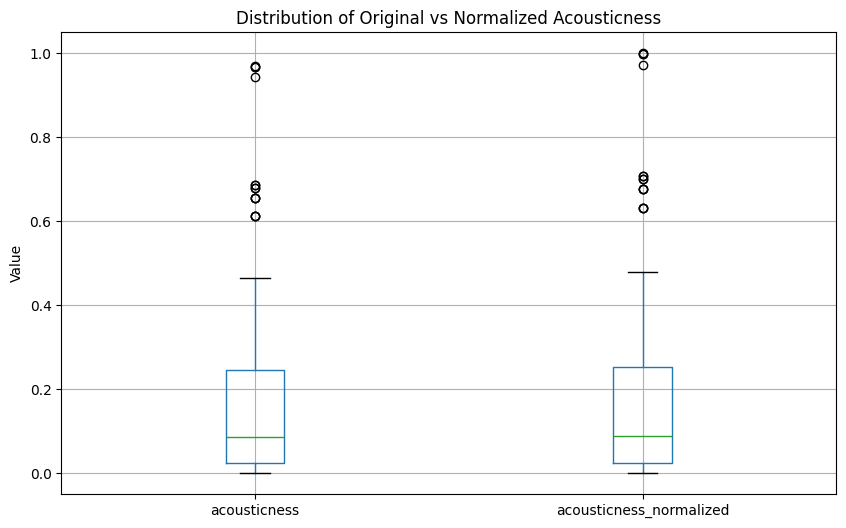

In [30]:
# Visualize original vs normalized acousticness
acoustic_features = ['acousticness', 'acousticness_normalized']
print("\nAcousticness Sample:")
print(df[acoustic_features].sample(5))

print("\nAcousticness Summary:")
print(df[acoustic_features].describe())

plt.figure(figsize=(10, 6))
df[acoustic_features].boxplot()
plt.title('Distribution of Original vs Normalized Acousticness')
plt.ylabel('Value')
plt.show()

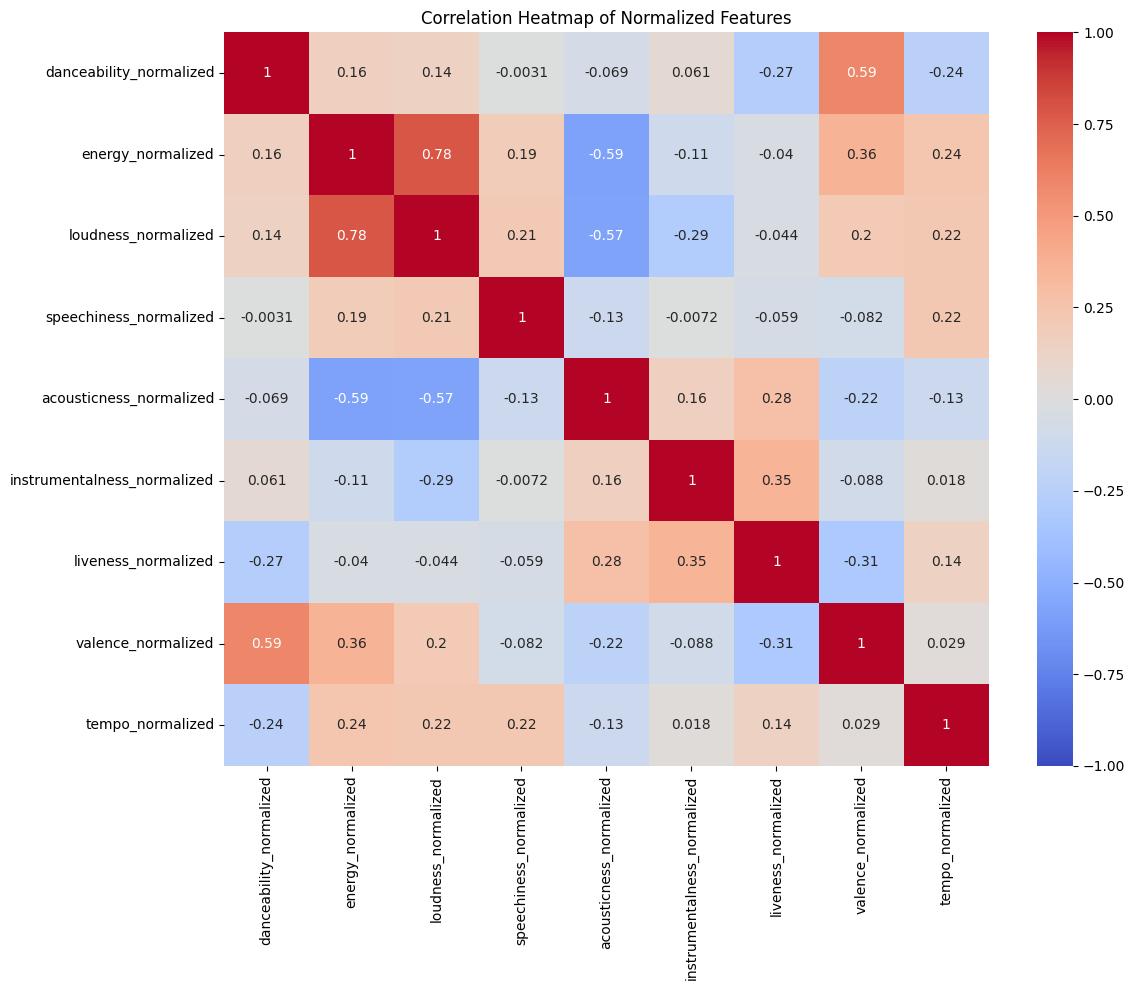

Notebook execution completed.


In [32]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Normalized Features')
plt.tight_layout()
plt.show()

print("Notebook execution completed.")